**Importación de bibliotecas a utilizar:**

In [52]:
import numpy as np                                        # Biblioteca de funciones matemáticas
import pandas as pd                                       # Biblioteca para manipulación de marcos de datos
from pandas.plotting import scatter_matrix                # Para generar matriz de diagramas de dispersión
import matplotlib.pyplot as plt                           # Biblioteca para salida gráfica
import geostatspy.GSLIB as GSLIB                          # Utilidades GSLIB y funciones envueltas
import geostatspy.geostats as geostats                    # GSLIB convertido a Python
import os                                                 # Para configurar el directorio de trabajo
plt.style.use('seaborn-bright')                           # Estilo visual de gráficos 

**Importación del dataset:**

In [73]:
os.chdir("C:/Users/heber/Documents/GSLIB_FOLDER") # ruta de ejecutables de GSLIB
df_biskaia = pd.read_excel("C:/Users/heber/Desktop/trafico/" + "datos_2_1.xlsx", sep=";", sheet_name='biskaia')
df_gipuskoa = pd.read_excel("C:/Users/heber/Desktop/trafico/" + "datos_2_1.xlsx", sep=";", sheet_name='gipuskoa')
df_araba = pd.read_excel("C:/Users/heber/Desktop/trafico/" + "datos_2_1.xlsx", sep=";", sheet_name='araba')

In [74]:
df_biskaia["X"] = df_biskaia["X"]/10000 #división del eje x en 10,000 para disminuir el numero de digitos del número. 
df_biskaia["Y"] = df_biskaia["Y"]/10000 #división del eje y en 10,000 para disminuir el numero de digitos del número. 

In [75]:
df_gipuskoa["X"] = df_gipuskoa["X"]/10000
df_gipuskoa["Y"] = df_gipuskoa["Y"]/10000

In [76]:
df_araba["X"] = df_araba["X"]/10000
df_araba["Y"] = df_araba["Y"]/10000

In [77]:
df = pd.concat([df_biskaia,df_gipuskoa, df_araba],ignore_index = True) #concatenación de marcos de datos por provincia.
df["ID"] = range(0,len(df["X"]))
df.head()

,X,Y,Intensidad media diaria,Pesados número,Nº railes,Velocidad (Km/h),province,ID
0,50.83057,478.89056,33784,1925.7,2,80,Biskaia,0
1,50.81487,478.89244,21428,707.1,2,70,Biskaia,1
2,50.78995,478.85040,22286,1002.9,2,50,Biskaia,2
3,50.74363,478.89187,22170,953.3,2,50,Biskaia,3
4,50.76978,478.79938,10184,336.1,1,40,Biskaia,4


**Declaración de variables a utilizar:**

In [78]:
x1 = df_biskaia["X"] #Variable de posición en eje X sistema ETRS89
y1 = df_biskaia["Y"] #Variable de posición en eje Y sistema ETRS89
x2 = df_gipuskoa["X"] #Variable de posición en eje X sistema ETRS89
y2 = df_gipuskoa["Y"] #Variable de posición en eje Y sistema ETRS89
x3 = df_araba["X"] #Variable de posición en eje X sistema ETRS89
y3 = df_araba["Y"] #Variable de posición en eje Y sistema ETRS89

imd_1 = df_biskaia["Intensidad media diaria"][np.isfinite(df_biskaia["Intensidad media diaria"])] #Variable de interés 1
pesados_1 =df_biskaia["Pesados número"][np.isfinite(df_biskaia["Pesados número"])] #Variable de interés 2
railes_1 = df_biskaia["Nº railes"][np.isfinite(df_biskaia["Nº railes"])] #Variable de interés 3 (Esta variable es categorica)
vm_1 = df_biskaia["Velocidad (Km/h)"][np.isfinite(df_biskaia["Velocidad (Km/h)"])] #Variable de interés 4

imd_2 = df_gipuskoa["Intensidad media diaria"][np.isfinite(df_gipuskoa["Intensidad media diaria"])] #Variable de interés 1
pesados_2 =df_gipuskoa["Pesados número"][np.isfinite(df_gipuskoa["Pesados número"])] #Variable de interés 2
railes_2 = df_gipuskoa["Nº railes"][np.isfinite(df_gipuskoa["Nº railes"])] #Variable de interés 3 (Esta variable es categorica)
vm_2 = df_gipuskoa["Velocidad (Km/h)"][np.isfinite(df_gipuskoa["Velocidad (Km/h)"])] #Variable de interés 4

imd_3 = df_araba["Intensidad media diaria"][np.isfinite(df_araba["Intensidad media diaria"])] #Variable de interés 1
pesados_3 =df_araba["Pesados número"][np.isfinite(df_araba["Pesados número"])] #Variable de interés 2
railes_3 = df_araba["Nº railes"][np.isfinite(df_araba["Nº railes"])] #Variable de interés 3 (Esta variable es categorica)
vm_3 = df_araba["Velocidad (Km/h)"][np.isfinite(df_araba["Velocidad (Km/h)"])] #Variable de interés 4

imd = df["Intensidad media diaria"][np.isfinite(df["Intensidad media diaria"])] #Variable de interés 1
pesados =df["Pesados número"][np.isfinite(df["Pesados número"])] #Variable de interés 2
railes = df["Nº railes"][np.isfinite(df["Nº railes"])] #Variable de interés 3 (Esta variable es categorica)
vm = df["Velocidad (Km/h)"][np.isfinite(df["Velocidad (Km/h)"])] #Variable de interés 4

In [79]:
df_biskaia.describe().transpose() #estadísticos básicos del marco de datos para Biskaia

,count,mean,std,min,25%,50%,75%,max
X,1075.0,52.059540,2.330078,46.415680,50.363685,51.842258,53.449313,60.266842
Y,1075.0,476.922158,2.605832,470.456568,474.723680,477.581740,479.208313,480.946700
Intensidad media diaria,1075.0,9014.225116,17420.571650,18.000000,367.500000,1881.000000,9863.000000,141110.000000
Pesados número,1075.0,840.506047,1762.526101,1.000000,19.050000,129.800000,650.550000,11077.500000
Nº railes,1075.0,1.274419,0.614873,1.000000,1.000000,1.000000,1.000000,4.000000
Velocidad (Km/h),1075.0,60.572093,21.089354,30.000000,50.000000,55.000000,70.000000,120.000000


In [80]:
df_gipuskoa.describe().transpose() #estadísticos básicos del marco de datos para Gipuskoa

,count,mean,std,min,25%,50%,75%,max
X,81.0,56.934584,1.921703,53.430315,55.123288,57.161383,58.33977,60.266842
Y,81.0,478.369762,1.211348,475.753705,477.157872,478.529263,479.32974,480.081850
Intensidad media diaria,81.0,21341.098765,15911.580139,136.000000,9584.000000,17243.000000,33838.00000,69718.000000
Pesados número,81.0,2930.530864,2882.655638,10.000000,628.000000,1892.000000,4840.00000,10494.000000
Nº railes,81.0,1.679012,0.686061,1.000000,1.000000,2.000000,2.00000,4.000000
Velocidad (Km/h),81.0,78.395062,26.002730,30.000000,50.000000,80.000000,100.00000,120.000000


In [81]:
df_araba.describe().transpose() #estadísticos básicos del marco de datos para Araba

,count,mean,std,min,25%,50%,75%,max
X,477.0,52.207612,1.893006,48.387477,50.698124,52.314330,53.630129,56.187565
Y,477.0,474.433577,1.692079,470.456568,473.562676,474.592567,475.491339,477.895799
Intensidad media diaria,477.0,2824.865828,6671.232061,18.000000,149.000000,424.000000,1765.000000,44416.000000
Pesados número,477.0,436.091195,1525.581540,1.000000,6.000000,20.100000,96.300000,11077.500000
Nº railes,477.0,1.090147,0.314642,1.000000,1.000000,1.000000,1.000000,3.000000
Velocidad (Km/h),477.0,61.111111,20.346841,30.000000,50.000000,60.000000,70.000000,120.000000


**Matriz de correlación entre variables de interés:** Para todo el País Vasco

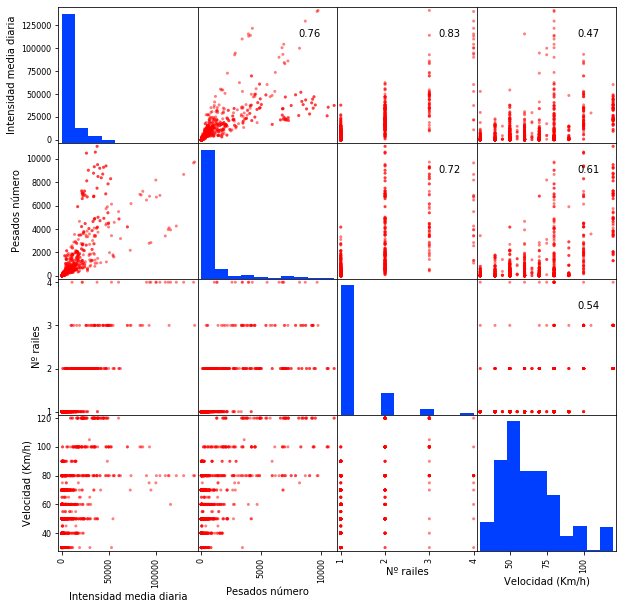

In [82]:
sub_dataset = ["Intensidad media diaria", "Pesados número", "Nº railes", "Velocidad (Km/h)"] #Lista variables de interés
df_sub = df[sub_dataset] #nuevo dataframe con variables de interés 

axes = scatter_matrix(df_sub, figsize=(10,10), color="red") #Matriz de diagramas de dispersión

corr = np.array(df_sub.corr()) #Coeficiente de correlación lineal
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)): 
    axes[i, j].annotate("%.2f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')

**Diagrama de cajas y bigotes:** Para el País Vasco en general

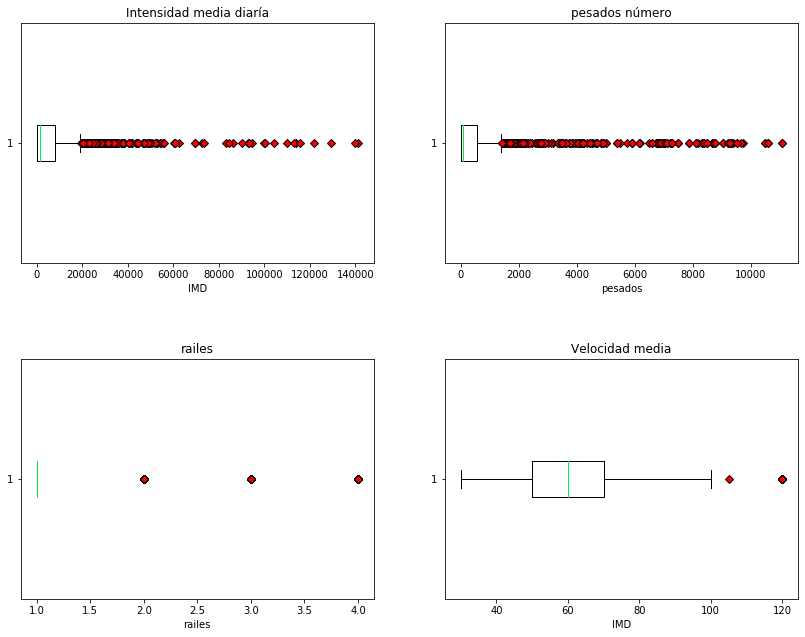

In [83]:
plt.subplot(221)
diamantes = dict(markerfacecolor='r', marker='D') 
plt.boxplot(imd, vert=False, flierprops=diamantes, showfliers=True)
plt.xlabel("IMD")
plt.title("Intensidad media diaría")
plt.subplot(222)
plt.boxplot(pesados, vert=False, flierprops=diamantes, showfliers=True)
plt.xlabel("pesados")
plt.title("pesados número")
plt.subplot(223)
plt.boxplot(railes, vert=False, flierprops=diamantes, showfliers=True)
plt.xlabel("railes")
plt.title("railes")
plt.subplot(224)
plt.boxplot(vm, vert=False, flierprops=diamantes, showfliers=True)
plt.xlabel("IMD")
plt.title("Velocidad media")
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.8, top=2, wspace=0.2, hspace=0.4)
plt.show()

**Disposición espacial de las variables de interés:**

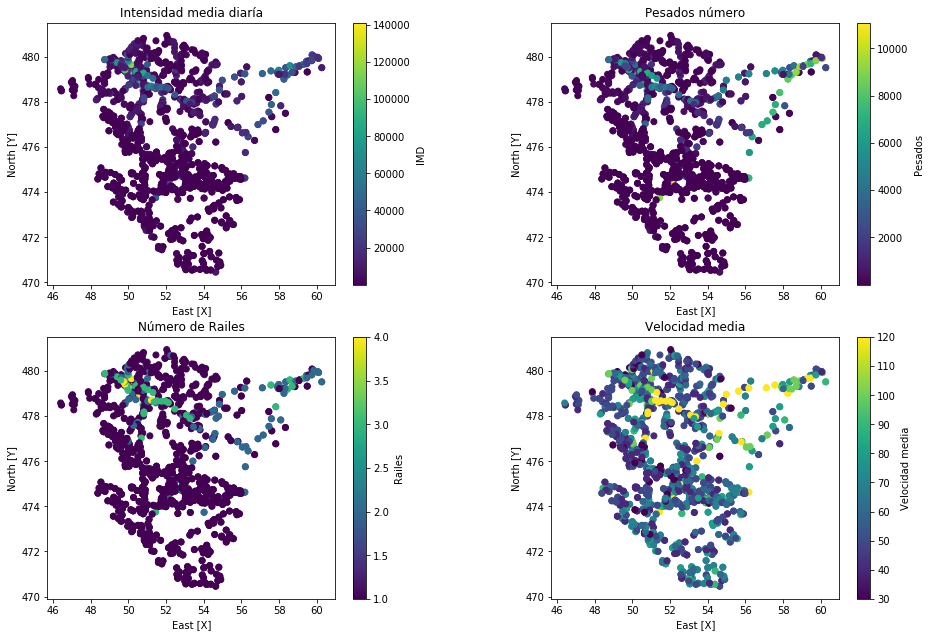

In [84]:
plt.subplot(221) #Salida de 4 gráficos en una fígura 
plt.scatter(df["X"], df["Y"], c=df["Intensidad media diaria"], cmap = plt.cm.viridis)
plt.ylabel('North [Y]')
plt.xlabel('East [X]')
plt.title("Intensidad media diaría")
cbar=plt.colorbar()
cbar.set_label('IMD', labelpad=+5)
plt.subplot(222)
plt.scatter(df["X"], df["Y"], c=df["Pesados número"], cmap = plt.cm.viridis)
plt.ylabel('North [Y]')
plt.xlabel('East [X]')
plt.title("Pesados número")
cbar=plt.colorbar()
cbar.set_label('Pesados', labelpad=+5)
plt.subplot(223)
plt.scatter(df["X"], df["Y"], c=df["Nº railes"], cmap = plt.cm.viridis)
plt.ylabel('North [Y]')
plt.xlabel('East [X]')
plt.title("Número de Railes")
cbar=plt.colorbar()
cbar.set_label('Railes', labelpad=+5)
plt.subplot(224)
plt.scatter(df["X"], df["Y"], c=df["Velocidad (Km/h)"], cmap = plt.cm.viridis)
plt.ylabel('North [Y]')
plt.xlabel('East [X]')
plt.title("Velocidad media")
cbar=plt.colorbar()
cbar.set_label('Velocidad media', labelpad=+5)
plt.subplots_adjust(left=0.0, bottom=0.0, right=2, top=2, wspace=0.4, hspace=0.2)
plt.show()

In [174]:
from scipy.cluster.hierarchy import dendrogram, linkage 

Z = linkage(df[sub_dataset], method="average", metric="euclidean") #Clustering Jerarquico Aglomerativo (machine learning)

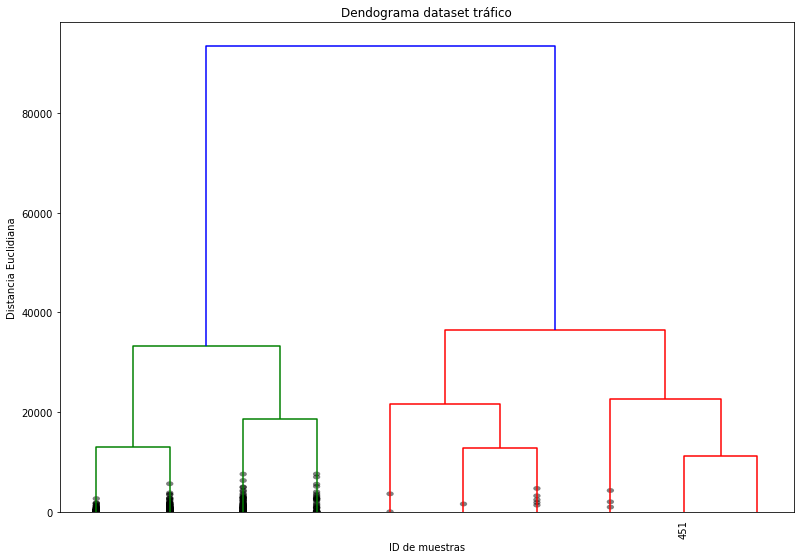

In [175]:
plt.subplot(111) #Visualización del Dendograma con las opciones de cluster
dendrogram(Z, leaf_rotation=90, leaf_font_size=10, truncate_mode="lastp", p=10, show_leaf_counts=False, show_contracted=True)
plt.ylabel("Distancia Euclidiana")
plt.xlabel("ID de muestras")
plt.title("Dendograma dataset tráfico")
plt.subplots_adjust(left=0, bottom=0, right=1.7, top=1.7)

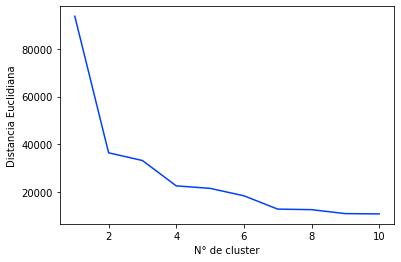

In [176]:
#Método del codo para seleccionar el numero de clusters:

plt.subplot(111)

distancias = Z[-10:, 2]
distancias_invertidas = distancias[::-1]

clusters_num = np.arange(1,len(distancias_invertidas) + 1)

plt.plot(clusters_num, distancias_invertidas)
plt.xlabel("N° de cluster")
plt.ylabel("Distancia Euclidiana")
plt.show()

In [177]:
from scipy.cluster.hierarchy import fcluster

max_d = 37000 #criterio por distancia

k =2 #criterio por número de cluster

cluster = fcluster(Z, max_d, criterion="distance") #Agrupamiento del DF por Clusters.
df_cluster = pd.DataFrame(cluster, columns=["Clusters"])
df["clusters"] = df_cluster["Clusters"]
df.head()

,X,Y,Intensidad media diaria,Pesados número,Nº railes,Velocidad (Km/h),province,ID,clusters
0,50.83057,478.89056,33784,1925.7,2,80,Biskaia,0,1
1,50.81487,478.89244,21428,707.1,2,70,Biskaia,1,1
2,50.78995,478.85040,22286,1002.9,2,50,Biskaia,2,1
3,50.74363,478.89187,22170,953.3,2,50,Biskaia,3,1
4,50.76978,478.79938,10184,336.1,1,40,Biskaia,4,1


**Visualización de los datos por cluster (1 y 2):** Se ve que existe un cluster muy pequeño con respecto al otro. 

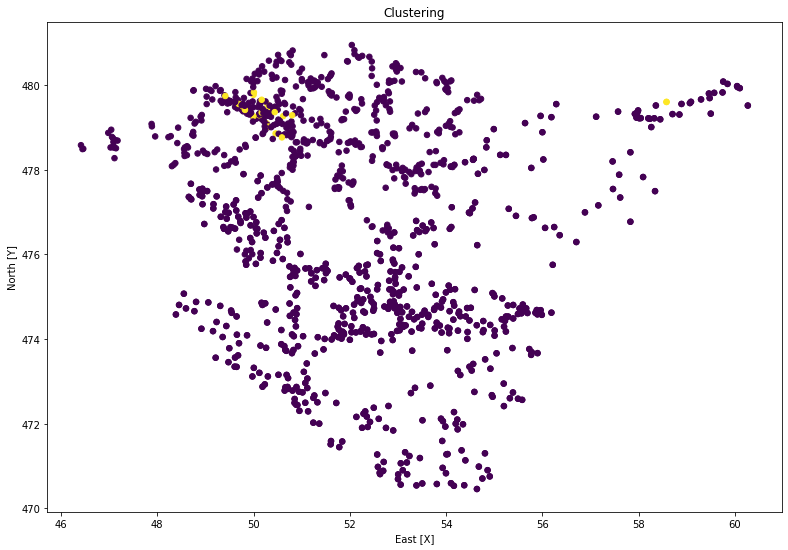

In [178]:
plt.scatter(df["X"], df["Y"], c=df["clusters"], s= 30, cmap = plt.cm.viridis) 
plt.ylabel('North [Y]')
plt.xlabel('East [X]')
plt.title("Clustering")
plt.subplots_adjust(left=0, bottom=0.0, right=1.7, top=1.7, wspace=0.2, hspace=0.2)
plt.show()

In [184]:
print("Cluster 2 equivalente al: ", round(df["X"][df["clusters"]==2].count()*100/df["X"].count(),2), "del total")

Cluster 2 equivalente al:  1.35 del total
